In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img

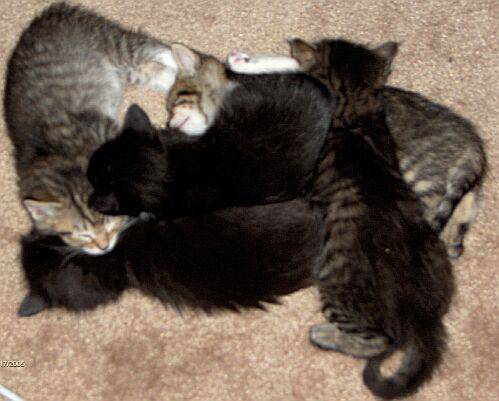

In [4]:
path = './dataset/val1/cats'
name = 'cat.10779.jpg'
fullname = f'{path}/{name}'
load_img(fullname)
#load_img('dataset/val1/dogs/dog.10779.jpg')

In [5]:
tf.__version__

'2.0.0'

# Model

In [6]:
#input shape
inputs = keras.Input(shape=(150, 150, 3))
#covolutional layer
conv = keras.layers.Conv2D(filters=32, kernel_size=(3,3), 
                           activation="relu")(inputs)
#reduce the size of the feature map
max_pool_2d = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
#produce outputs 
vectors = keras.layers.Flatten()(max_pool_2d)
#inner dense layer
dense = keras.layers.Dense(64, activation='relu')(vectors) 
#appropriate activation for the binary classification case
outputs = keras.layers.Dense(1, activation='sigmoid')(dense)
#CNN model
CNNmodel = keras.Model(inputs, outputs)
#optimizer
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)


2021-11-28 18:18:55.043881: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-28 18:18:55.044434: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


# Question 1

In [7]:
# The best loss function for binary classification tasks is BinaryCrossentropy.
loss = keras.losses.BinaryCrossentropy()

# Question 2

In [8]:
#the total number of parameters of the model
CNNmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________

the total number of parameters of the model is 11,215,873

# Generators and Training


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Load images using keras ImageDataGenerator class
image_gen = ImageDataGenerator(rescale=1./255)

train_ds = image_gen.flow_from_directory(
    './dataset/train1',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)


val_ds = image_gen.flow_from_directory(
    './dataset/val1',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
# define optimizer, loss, and performance metric to the CNN model
CNNmodel.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [13]:
#train the model
history = CNNmodel.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
) 


2021-11-28 18:19:18.791552: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 211 of 1000
2021-11-28 18:19:28.810573: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 420 of 1000
2021-11-28 18:19:38.818148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 631 of 1000
2021-11-28 18:19:48.798047: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 840 of 1000
2021-11-28 18:19:56.391885: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 100 steps, validate for 50 steps
Epoch 1/10


2021-11-28 18:20:07.688673: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 286 of 1000
2021-11-28 18:20:17.678477: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 565 of 1000
2021-11-28 18:20:27.717406: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 845 of 1000


  1/100 [..............................] - ETA: 1:00:32 - loss: 0.7205 - accuracy: 0.4000

2021-11-28 18:20:33.551584: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 50s 505ms/step - loss: 0.6971 - accuracy: 0.5195 - val_loss: 0.6955 - val_accuracy: 0.5080
Epoch 2/10


2021-11-28 18:20:57.991986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 181 of 1000
2021-11-28 18:21:07.973625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 359 of 1000
2021-11-28 18:21:17.979574: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 535 of 1000
2021-11-28 18:21:27.969621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 758 of 1000


  2/100 [..............................] - ETA: 39:53 - loss: 0.6502 - accuracy: 0.6500  

2021-11-28 18:21:36.122927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 61s 615ms/step - loss: 0.6869 - accuracy: 0.5480 - val_loss: 0.6806 - val_accuracy: 0.5600
Epoch 3/10


2021-11-28 18:21:59.444237: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 175 of 1000
2021-11-28 18:22:09.438114: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 353 of 1000
2021-11-28 18:22:19.412284: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 638 of 1000
2021-11-28 18:22:29.425405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 933 of 1000


  2/100 [..............................] - ETA: 35:03 - loss: 0.6731 - accuracy: 0.5500  

2021-11-28 18:22:31.692973: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 56s 556ms/step - loss: 0.6783 - accuracy: 0.5740 - val_loss: 0.6838 - val_accuracy: 0.5290
Epoch 4/10


2021-11-28 18:22:55.021622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 175 of 1000
2021-11-28 18:23:05.020632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 354 of 1000
2021-11-28 18:23:14.988582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 630 of 1000
2021-11-28 18:38:22.865198: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 848 of 1000
2021-11-28 18:38:22.935225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 849 of 1000
2021-11-28 18:38:22.977402: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 850 of 1000
2021-11-28 18:38:23.010134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle b

2021-11-28 18:38:25.161053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 901 of 1000
2021-11-28 18:38:25.198166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 902 of 1000
2021-11-28 18:38:25.234717: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 903 of 1000
2021-11-28 18:38:25.270657: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 904 of 1000
2021-11-28 18:38:25.307479: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 905 of 1000
2021-11-28 18:38:25.344185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 906 of 1000
2021-11-28 18:38:25.383752: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle b

  2/100 [..............................] - ETA: 12:52:24 - loss: 0.6666 - accuracy: 0.6750

2021-11-28 18:38:30.131040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 959s 10s/step - loss: 0.6699 - accuracy: 0.5715 - val_loss: 0.6675 - val_accuracy: 0.5990
Epoch 5/10


2021-11-28 18:38:53.934091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 180 of 1000
2021-11-28 18:39:03.947868: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 364 of 1000
2021-11-28 18:39:13.930920: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 546 of 1000
2021-11-28 18:39:23.952595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 729 of 1000
2021-11-28 18:39:33.963834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 940 of 1000


  2/100 [..............................] - ETA: 43:29 - loss: 0.6102 - accuracy: 0.7500  

2021-11-28 18:39:36.473302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 66s 664ms/step - loss: 0.6678 - accuracy: 0.5815 - val_loss: 0.6637 - val_accuracy: 0.6240
Epoch 6/10


2021-11-28 18:40:00.346662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 175 of 1000
2021-11-28 18:40:10.327564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 432 of 1000
2021-11-28 18:40:20.355386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 713 of 1000
2021-11-28 18:40:30.316999: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 984 of 1000


  2/100 [..............................] - ETA: 33:57 - loss: 0.6410 - accuracy: 0.6750  

2021-11-28 18:40:31.206268: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 55s 552ms/step - loss: 0.6586 - accuracy: 0.6185 - val_loss: 0.6574 - val_accuracy: 0.6150
Epoch 7/10


2021-11-28 18:40:55.480035: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 177 of 1000
2021-11-28 18:41:05.479068: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 360 of 1000
2021-11-28 18:41:15.485385: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 555 of 1000
2021-11-28 18:41:25.490875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 834 of 1000


  2/100 [..............................] - ETA: 38:14 - loss: 0.6443 - accuracy: 0.6000  

2021-11-28 18:41:31.600692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 61s 611ms/step - loss: 0.6648 - accuracy: 0.5985 - val_loss: 0.6565 - val_accuracy: 0.6070
Epoch 8/10


2021-11-28 18:41:56.653390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 176 of 1000
2021-11-28 18:42:06.694847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 354 of 1000
2021-11-28 18:42:16.677980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 532 of 1000
2021-11-28 18:42:26.672892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 706 of 1000
2021-11-28 18:42:36.675741: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 925 of 1000


  2/100 [..............................] - ETA: 43:59 - loss: 0.6651 - accuracy: 0.5500  

2021-11-28 18:42:39.733074: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 67s 672ms/step - loss: 0.6530 - accuracy: 0.6105 - val_loss: 0.6452 - val_accuracy: 0.6450
Epoch 9/10


2021-11-28 18:43:03.831973: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 185 of 1000
2021-11-28 18:43:13.801279: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 368 of 1000
2021-11-28 18:43:23.804608: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 597 of 1000
2021-11-28 18:43:33.793450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 868 of 1000


  2/100 [..............................] - ETA: 37:28 - loss: 0.6294 - accuracy: 0.6750  

2021-11-28 18:43:38.936048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 59s 593ms/step - loss: 0.6577 - accuracy: 0.5965 - val_loss: 0.6474 - val_accuracy: 0.6370
Epoch 10/10


2021-11-28 18:44:03.101396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 184 of 1000
2021-11-28 18:44:13.150917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 368 of 1000
2021-11-28 18:44:23.131791: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 621 of 1000
2021-11-28 18:44:33.101395: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 889 of 1000


  2/100 [..............................] - ETA: 36:51 - loss: 0.6222 - accuracy: 0.7500  

2021-11-28 18:44:37.501982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 58s 582ms/step - loss: 0.6378 - accuracy: 0.6295 - val_loss: 0.6323 - val_accuracy: 0.6450


# Question 3

In [14]:
# the median of training accuracy for this model
np.median(history.history['accuracy'])

0.589

In [16]:
for data_batch, labels_batch in train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Question 4

In [17]:
# the standard deviation of training loss for this model
np.std(history.history['loss'])

0.016288376985718698

# Data Augmentation

In [18]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
)

train_ds_aug = train_data_gen.flow_from_directory(
    './dataset/train1',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)



Found 20000 images belonging to 2 classes.


# Question 5

In [19]:
# the mean of validation loss for the model trained with augmentations
history2 = CNNmodel.fit(
    train_ds_aug,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

2021-11-28 20:01:29.584575: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 1000
2021-11-28 20:01:39.558837: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 195 of 1000
2021-11-28 20:01:49.560572: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 289 of 1000
2021-11-28 20:01:59.601963: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 380 of 1000
2021-11-28 20:02:09.545347: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 470 of 1000
2021-11-28 20:02:19.565832: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 554 of 1000
2021-11-28 20:02:29.566041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

Train for 100 steps, validate for 50 steps
Epoch 1/10


2021-11-28 20:03:29.374205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 77 of 1000
2021-11-28 20:03:39.360196: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 153 of 1000
2021-11-28 20:03:49.491992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 233 of 1000
2021-11-28 20:03:59.441743: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 308 of 1000
2021-11-28 20:04:09.461893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 383 of 1000
2021-11-28 20:04:19.399464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 459 of 1000
2021-11-28 20:04:29.471598: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

100/100 [==============================] - 145s 1s/step - loss: 0.6670 - accuracy: 0.5835 - val_loss: 0.6421 - val_accuracy: 0.6280
Epoch 2/10


2021-11-28 20:05:55.054700: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 78 of 1000
2021-11-28 20:06:04.961763: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 156 of 1000
2021-11-28 20:06:14.979642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 234 of 1000
2021-11-28 20:06:25.020471: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 314 of 1000
2021-11-28 20:06:35.046980: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 394 of 1000
2021-11-28 20:06:45.051018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 471 of 1000
2021-11-28 20:06:54.999792: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:44:38 - loss: 0.6718 - accuracy: 0.6000

2021-11-28 20:07:52.216422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 141s 1s/step - loss: 0.6689 - accuracy: 0.5785 - val_loss: 0.6309 - val_accuracy: 0.6560
Epoch 3/10


2021-11-28 20:08:15.766649: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 86 of 1000
2021-11-28 20:08:25.780770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 180 of 1000
2021-11-28 20:08:35.717993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 273 of 1000
2021-11-28 20:08:45.791354: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 369 of 1000
2021-11-28 20:08:55.724048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 463 of 1000
2021-11-28 20:09:05.762345: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 554 of 1000
2021-11-28 20:09:15.723716: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:28:20 - loss: 0.6664 - accuracy: 0.5250

2021-11-28 20:09:53.219194: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 121s 1s/step - loss: 0.6607 - accuracy: 0.5895 - val_loss: 0.6296 - val_accuracy: 0.6620
Epoch 4/10


2021-11-28 20:10:16.940582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 78 of 1000
2021-11-28 20:10:26.982057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 158 of 1000
2021-11-28 20:10:36.962674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 235 of 1000
2021-11-28 20:10:46.924913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 325 of 1000
2021-11-28 20:10:56.934488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 420 of 1000
2021-11-28 20:11:06.928923: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 516 of 1000
2021-11-28 20:11:16.922108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:33:12 - loss: 0.6902 - accuracy: 0.5250

2021-11-28 20:12:00.307977: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 128s 1s/step - loss: 0.6578 - accuracy: 0.6010 - val_loss: 0.6248 - val_accuracy: 0.6360
Epoch 5/10


2021-11-28 20:12:24.655259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 78 of 1000
2021-11-28 20:12:34.647168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 155 of 1000
2021-11-28 20:12:44.746460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 233 of 1000
2021-11-28 20:12:54.729055: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 310 of 1000
2021-11-28 20:13:04.646535: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 387 of 1000
2021-11-28 20:13:14.680635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 471 of 1000
2021-11-28 20:13:24.712768: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  1/100 [..............................] - ETA: 3:18:59 - loss: 0.6571 - accuracy: 0.6000

2021-11-28 20:14:14.592233: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 134s 1s/step - loss: 0.6672 - accuracy: 0.5790 - val_loss: 0.6296 - val_accuracy: 0.6620
Epoch 6/10


2021-11-28 20:14:38.930115: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 75 of 1000
2021-11-28 20:14:48.973979: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 154 of 1000
2021-11-28 20:14:58.951668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 234 of 1000
2021-11-28 20:15:08.905888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 311 of 1000
2021-11-28 20:15:18.889498: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 391 of 1000
2021-11-28 20:15:28.876405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 472 of 1000
2021-11-28 20:15:38.895105: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:43:13 - loss: 0.6350 - accuracy: 0.6500

2021-11-28 20:16:34.512220: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 139s 1s/step - loss: 0.6608 - accuracy: 0.6005 - val_loss: 0.6239 - val_accuracy: 0.6390
Epoch 7/10


2021-11-28 20:16:58.300501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 77 of 1000
2021-11-28 20:17:08.265387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 156 of 1000
2021-11-28 20:17:18.260982: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 236 of 1000
2021-11-28 20:17:28.257635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 316 of 1000
2021-11-28 20:17:38.300630: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 395 of 1000
2021-11-28 20:17:48.206415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 476 of 1000
2021-11-28 20:18:38.520647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

100/100 [==============================] - 184s 2s/step - loss: 0.6463 - accuracy: 0.6160 - val_loss: 0.6232 - val_accuracy: 0.6300
Epoch 8/10


2021-11-28 20:20:02.855337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 78 of 1000
2021-11-28 20:20:12.836429: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 156 of 1000
2021-11-28 20:20:22.856595: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 234 of 1000
2021-11-28 20:20:32.778931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 311 of 1000
2021-11-28 20:20:42.853865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 393 of 1000
2021-11-28 20:20:52.842698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 473 of 1000
2021-11-28 20:21:02.823864: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:43:04 - loss: 0.5991 - accuracy: 0.6000

2021-11-28 20:21:58.120259: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 139s 1s/step - loss: 0.6335 - accuracy: 0.6360 - val_loss: 0.6189 - val_accuracy: 0.6510
Epoch 9/10


2021-11-28 20:22:21.758544: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 79 of 1000
2021-11-28 20:22:31.808440: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 160 of 1000
2021-11-28 20:22:41.826084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 242 of 1000
2021-11-28 20:22:51.826626: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 324 of 1000
2021-11-28 20:23:01.793677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 407 of 1000
2021-11-28 20:23:11.836309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 489 of 1000
2021-11-28 20:23:21.770760: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 4:44:19 - loss: 0.6282 - accuracy: 0.6250

2021-11-28 20:27:59.183559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 361s 4s/step - loss: 0.6436 - accuracy: 0.6085 - val_loss: 0.6169 - val_accuracy: 0.6600
Epoch 10/10


2021-11-28 20:28:22.867800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 75 of 1000
2021-11-28 20:28:32.881140: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 151 of 1000
2021-11-28 20:28:42.870732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 227 of 1000
2021-11-28 20:28:52.910996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 305 of 1000
2021-11-28 20:29:02.907164: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 386 of 1000
2021-11-28 20:29:12.959277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 466 of 1000
2021-11-28 20:29:22.922657: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle bu

  2/100 [..............................] - ETA: 1:44:16 - loss: 0.6643 - accuracy: 0.5750

2021-11-28 20:30:19.790125: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


100/100 [==============================] - 141s 1s/step - loss: 0.6401 - accuracy: 0.6160 - val_loss: 0.6133 - val_accuracy: 0.6760


In [20]:
np.mean(history.history['val_loss'])

0.6629857625961304

# Question 6

In [28]:
history.history['val_accuracy'][5:10]

[0.615, 0.607, 0.645, 0.637, 0.645]

In [29]:
# the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations
np.mean(history.history['val_accuracy'][5:10])

0.62979996